# Homework 3

In this homework we will practice basic analysis such as feature extraction and data transforms (Fourier, wavelet), and feature extraction.

In the 2023 course offering, pick either 1. or 2., and then 3.

**1. Ice-shelf seismograms** (10 points)

Time-domain filtering, 1D Fourier transform.

**2. TEC from the Hunga-Tunga explosion** (10 points)

Time-domain filtering, 1D wavelet transform.

**3. 2D Crustal model** (10 points)

practice reading netcdf, making maps and exploring 2D spectral content.



## 1) Time Frequency analysis of iceshelf vibrations 

We will explore the spectral content of the vibrations felt on iceshelves. We first download seismic data, then filter it at different frequency bandwidths, then plot the spectrogram and comment on the data.

The seismic data is handled by the Obspy package. Review the obspy tutorial that Ariane.
We will download the data presented in: Aster, R.C., Lipovsky, B.P., Cole, H.M., Bromirski, P.D., Gerstoft, P., Nyblade, A., Wiens, D.A. and Stephen, R., 2021. Swell‐Triggered Seismicity at the Near‐Front Damage Zone of the Ross Ice Shelf. Seismological Research Letters. https://doi.org/10.1785/0220200478

__Tips__:
1. Check out the SciPy filtering help here: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html. Obspy has built in functions as well, but for the sake of practicing, explore the scipy filtering functions.

2. The usual steps to handling seismic data are: data download (``get_waveforms``) & removing the instrumental response (``remove_response``).




**a. Import the relevant Obspy python modules (1 point).**

In [ ]:
# Import the Obspy modules that will be useful to download seismic data


**b. Data download (1 point)**

We will now download the data from station "DR01" from seismic network "XH", channel "LHN" from 1/1/2015 until 3/31/2015. The client will be the "IRIS" data center. Obspy functions take on UTCDateTime formatted obspy datetime object, be sure to call or import that specific function. (1 point)

In [ ]:
# answer below



In [ ]:
# how many days did we download?
dt=Tend-Tstart # in seconds
Ndays = int(dt/86400) # in days
print(Ndays)

**c. Time series filtering (2 points)**

Now we will filter the trace to explore its frequency content. We will apply 3 filters:
1. a ``lowpass`` filter to look at seismic frequencies below 0.01Hz, or 100 s period

2. a ``bandpass`` filter to look at seismic frequencies between 0.01Hz-0.1 Hz (10-100s)

3. a ``highpass`` filter to look at seismic frequencies higher than 0.1 Hz (10s) and until the time series Nyquist frequency (0.5Hz since the data is sampled at 1 Hz).

In [ ]:
# answer below
from scipy.signal import butter,buttord,  sosfiltfilt, freqs


# Here we use a Butterworth filter to select the spectral content of the waveform. 
# I like to use Buttord because it finds the order of the filter that meets the amplitude reduction criterion
# it's a lot more intuitive! https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html


**c. Fourier transform (3 points)**


Perform and the Fourier amplitude spectrum of the seismogram. Don't forget to label the figure properly! Use the Fourier frequency vector for x-axis. Use the tutorials for inspirtion.

In [ ]:
# import FFT modules
# answer below

Comment on the spectral content of the seismograms. How does the relative contribution of the low, intermediate, and high frequency signal compares with the relative amplitude observed in the bandpass filtered time series?

**d. Synthetic noise (3 points)**

We have now a good idea of what the amplitude of seismic waves are at this station. Now create a noise signal using the Fourier amplitude spectrum of the seismic signal, and with a random phase. You can use the notes from our first Numpy example (2.7_data_transforms.ipynb)

In [ ]:

# answer below
from numpy import random
from scipy.fftpack import ifft,ifftshift 


**e. !Sanity check! (1 point)**

Check that the Fourier amplitude spectrum of the noise is that of the original window. Overlay them on a plot 

In [ ]:
# answer below

**f. Short Time Fourier Transform (3 points)**

STFT are important transforms that are used in data science of time series. They are mainly used for denoising and for feature extraction.
Spectrograms are STFT with window overlap.

In [ ]:
# answer below
from scipy.signal import stft


## 2. Time Series analysis of Hunga- Tonga
 Ghent and Crowell, 2022: TF representation of the TEC (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL100145). The Total Electron Content (TEC) is the total number of electrons present along a path between a radio transmitter and receiver. TEC is measured in electrons per square meter. By convention, 1 TEC Unit TECU = 10^16 electrons/m². Vertical TEC values in Earth’s ionosphere can range from a few to several hundred TECU.

 On 15 January 2022, Tonga's Hunga Tonga-Hunga Ha'apai (HTHH) volcano violently erupted, generating a tsunami that killed three people. Acoustic-gravity waves propagated by the eruption and tsunami caused global complex ionospheric disturbances. In this paper, we study the nature of these perturbations from Global Navigation Satellite System observables over the southwestern Pacific. After processing data from 818 ground stations, we detect supersonic acoustic waves, Lamb waves, and tsunamis, with filtered magnitudes between 1 and 7 Total Electron Content units.

Apply the Fourier and Wavelet transforms to the TEC time series observed a a GPS section..


### a. Read the data (1 point)

Read the CSV file file ``./TEC/ioncorr_samo_015_2022_tonga.csv``, print the keys of the data frame. THe key ``time`` is a timestamp of seconds since epoch time (1970/01/01). The data shown in the article is in the Series ``variometric_derived_TEC``. **samo** is the name of the GPS receiver. There are up to 32 satellite data saved in the CSV file.

Plot the first 2 hours of the time series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# answer below
tec_data = pd.read_csv("data/ioncorr_samo_015_2022_tonga.csv")

print(tec_data.columns) # double check

Index(['Unnamed: 0', 'GPS_seconds', 'satellite_number',
       'variometric_derived_TEC', 'variometric_derived_TEC_filtered',
       'absolute_derived_TEC', 'absolute_derived_TEC_filtered',
       'latitude_piercing_point', 'longitude_piercing_point',
       'satellite_azimuth', 'satellite_elevation_angle',
       'distance_to_piercing_point', 'time'],
      dtype='object')


In [6]:
tec_data['time'] = pd.to_datetime(tec_data['time'], unit='s')

# filter for the first 2 hours
tec_data_filt = tec_data[tec_data['time'] < tec_data['time'].iloc[0] + pd.Timedelta(hours=2)]

print(tec_data_filt)

       Unnamed: 0   GPS_seconds  satellite_number  variometric_derived_TEC  \
0               0  1.326293e+09                 1                 0.012495   
1               1  1.326293e+09                 1                 0.040731   
2               2  1.326293e+09                 1                 0.053964   
3               3  1.326293e+09                 1                 0.077087   
4               4  1.326293e+09                 1                 0.076847   
...           ...           ...               ...                      ...   
14384       14384  1.326284e+09                32                 0.095299   
14385       14385  1.326284e+09                32                 0.076074   
14386       14386  1.326284e+09                32                 0.096131   
14387       14387  1.326284e+09                32                 0.093255   
14388       14388  1.326284e+09                32                 0.053626   

       variometric_derived_TEC_filtered  absolute_derived_TEC  

Text(0, 0.5, 'Variometric Derived TEC')

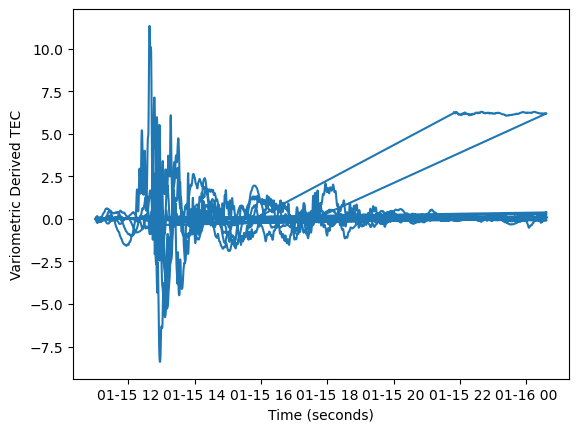

In [7]:
# maybe should index by time instead
plt.plot(tec_data_filt['time'], tec_data_filt['variometric_derived_TEC'])
plt.xlabel('Time (seconds)')
plt.ylabel('Variometric Derived TEC')

## b. Get station info (0.5 point)
Get the station name by splitting the string of the file name and getting the charcater after "ioncorr". You can use the python function ``split()``.

In [8]:
filename = "samo_015_2022_tonga"
# is that what you're asking? I don't understand

## c. Plot all data (2 points)
Make a plot of all vTEC filtered (``variometric_derived_TEC_filtered``) for each satellite. Align the data with the satellite number.

Use the ``plot_date`` function from matplotlib. Convert the Series ``time`` from a ``timestamp`` to an Numpy array of dtpe ``datetime64[s]`` (time stamps are in seconds, so we need to use ``[s]``). Plot the data for each sattelite observations.

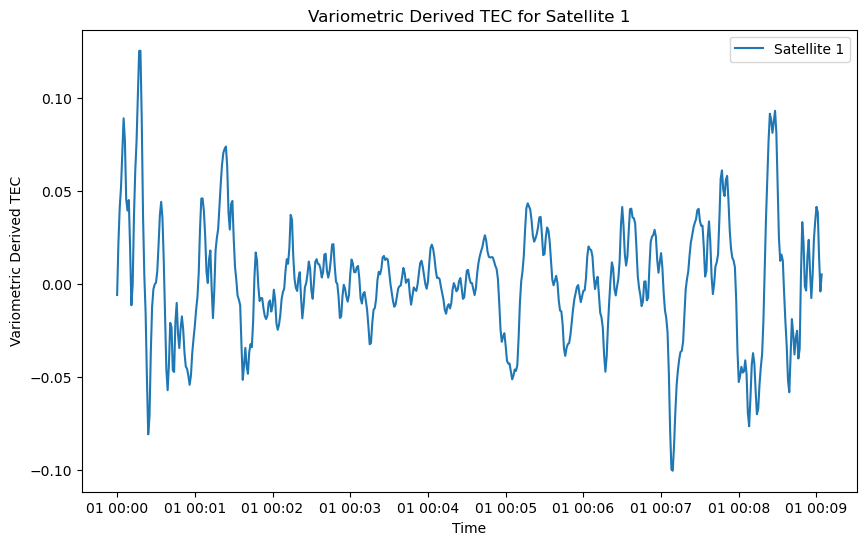

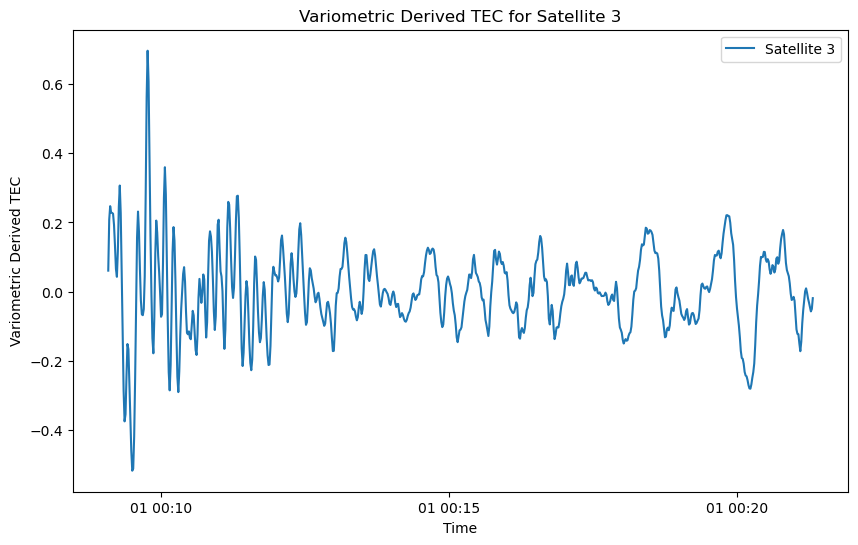

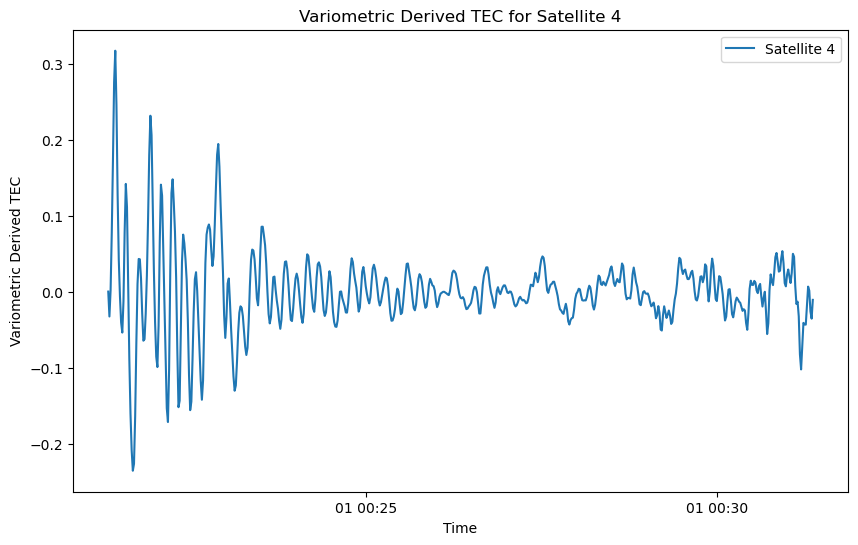

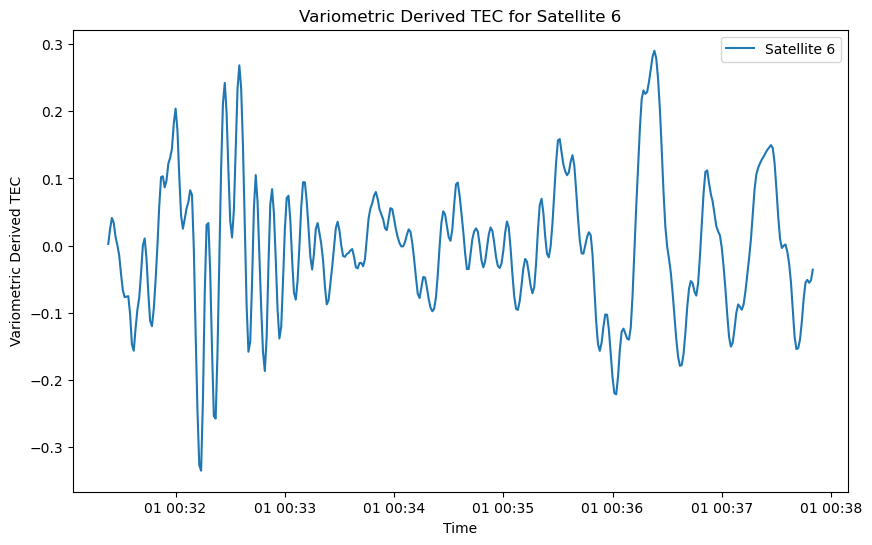

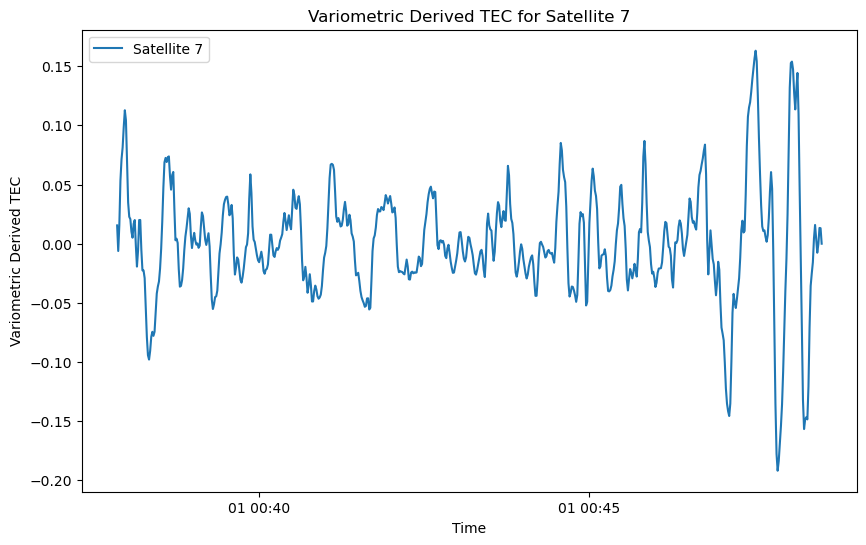

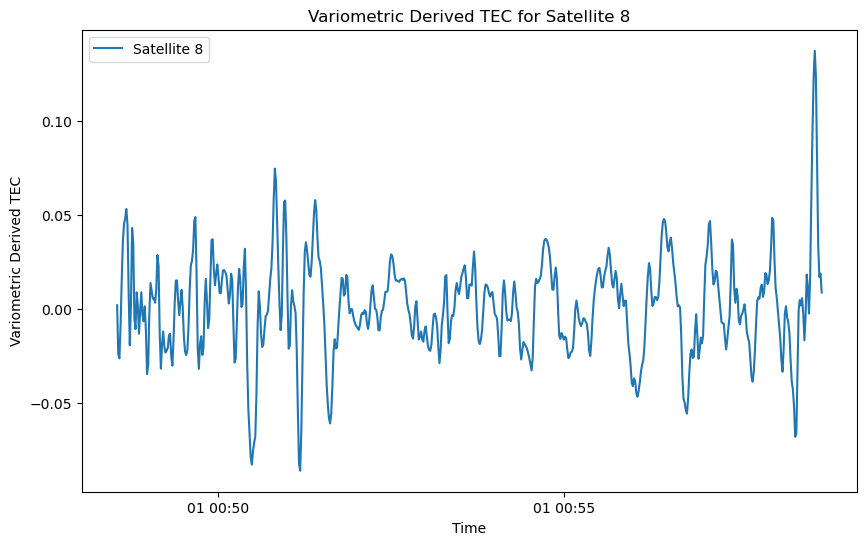

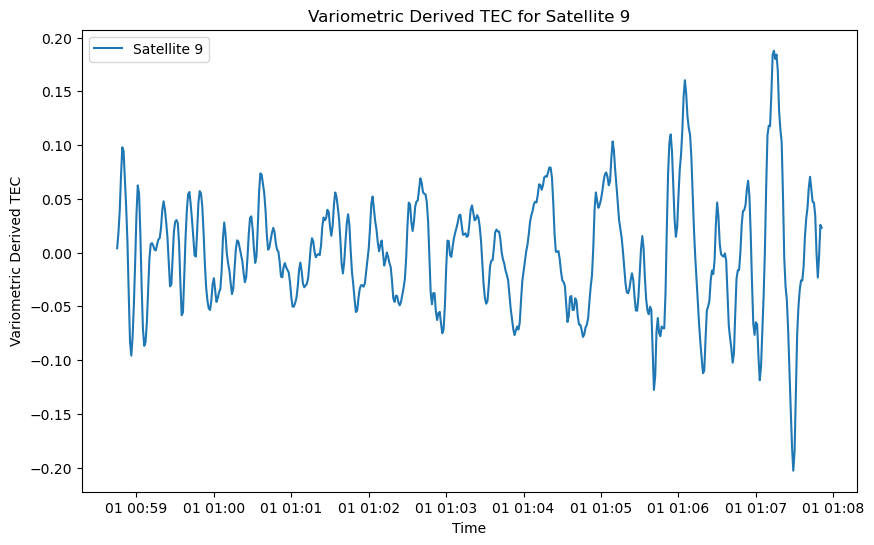

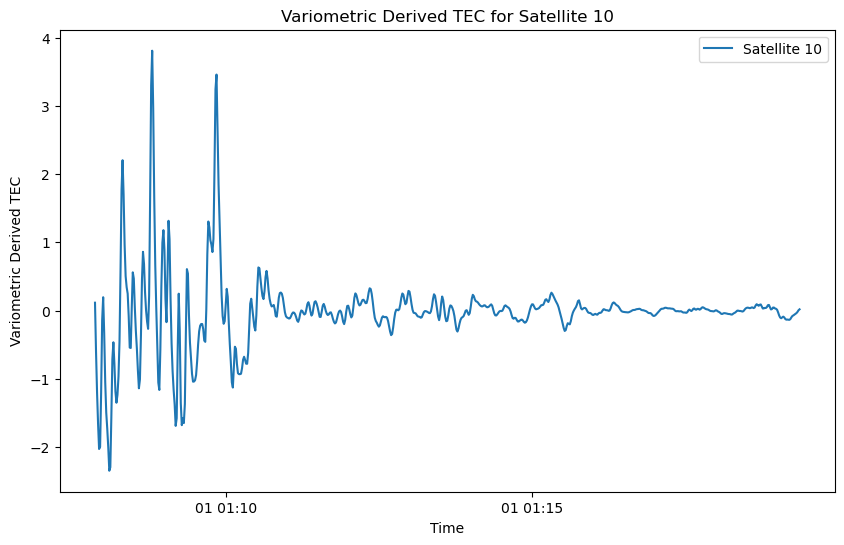

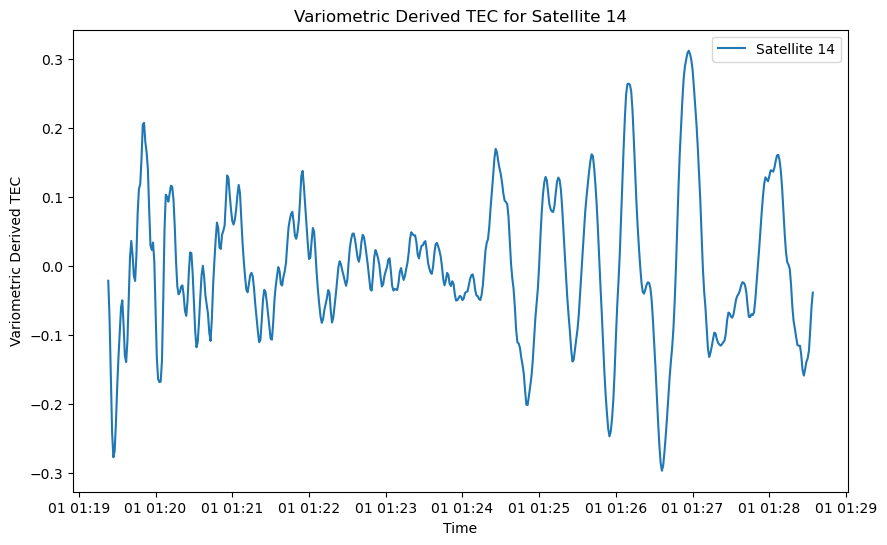

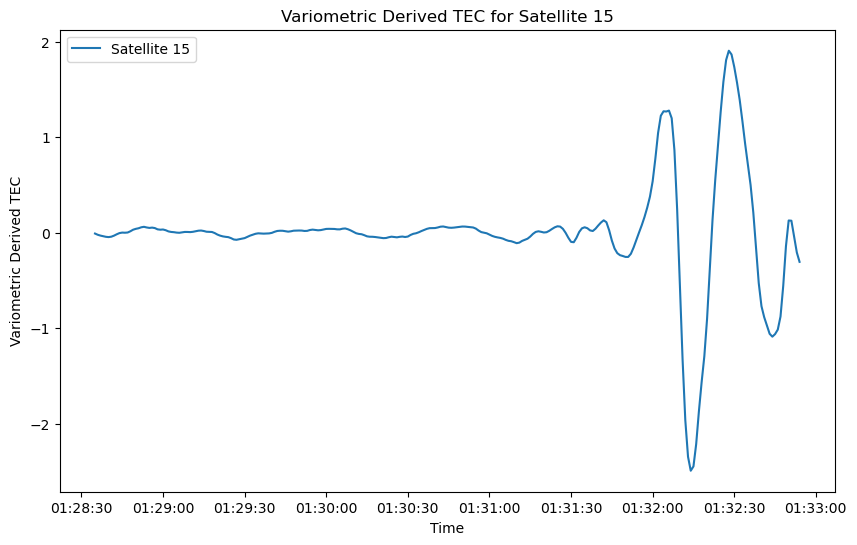

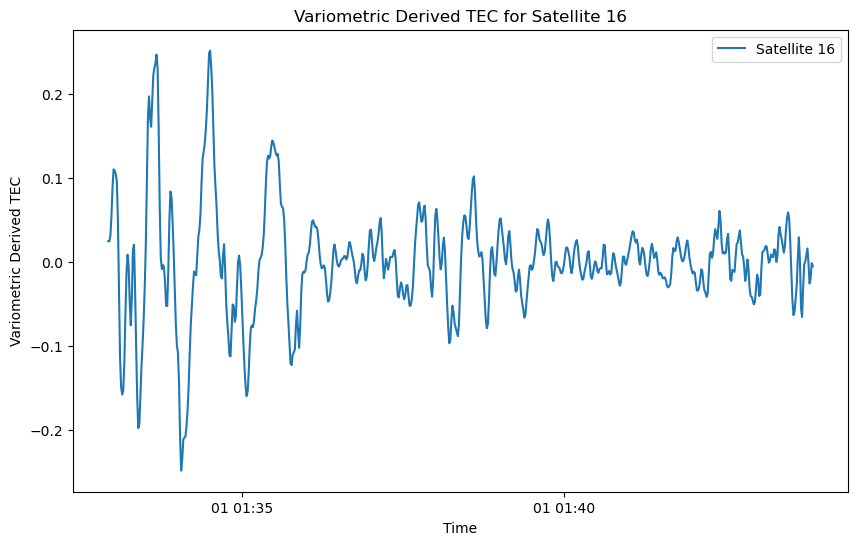

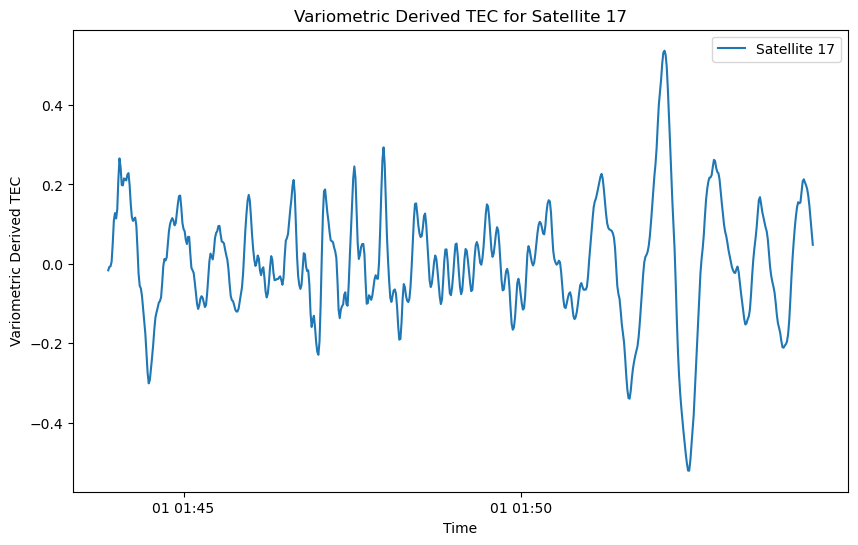

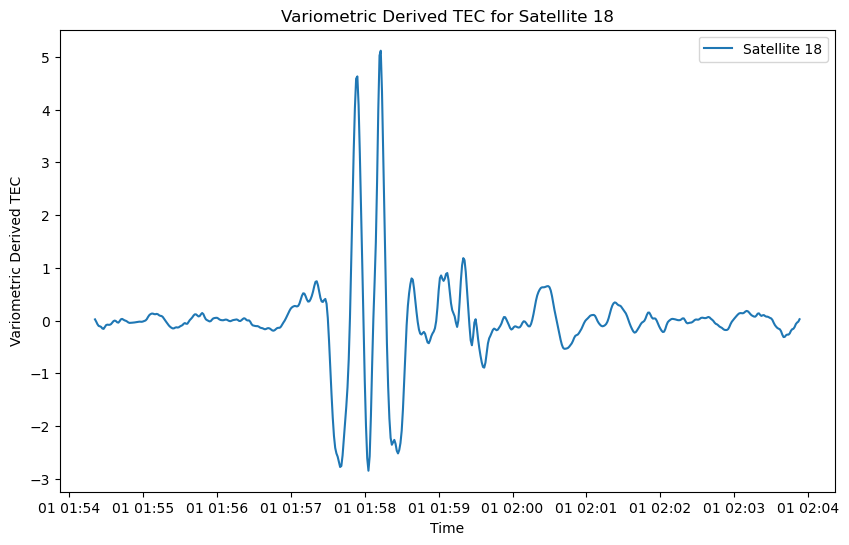

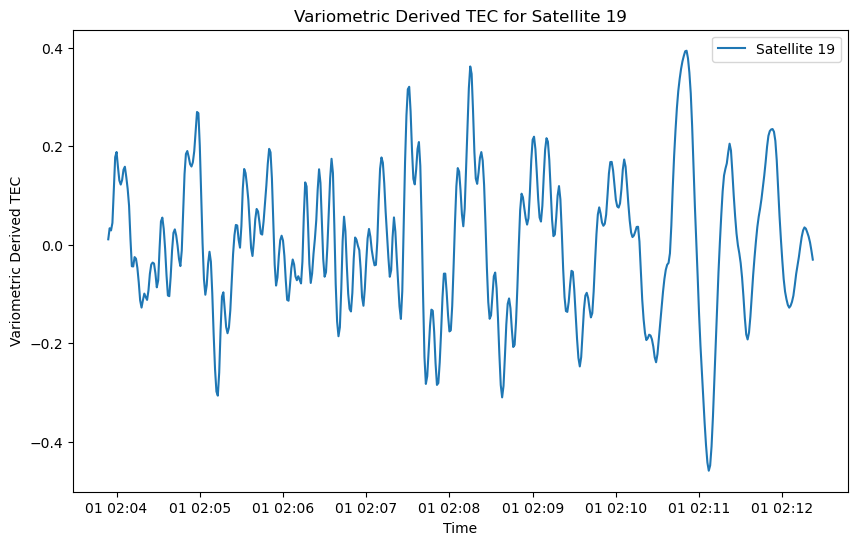

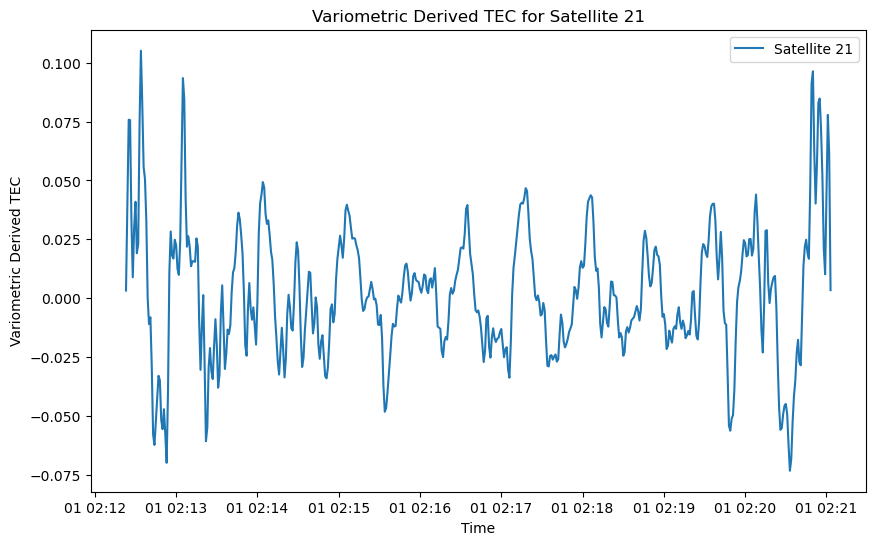

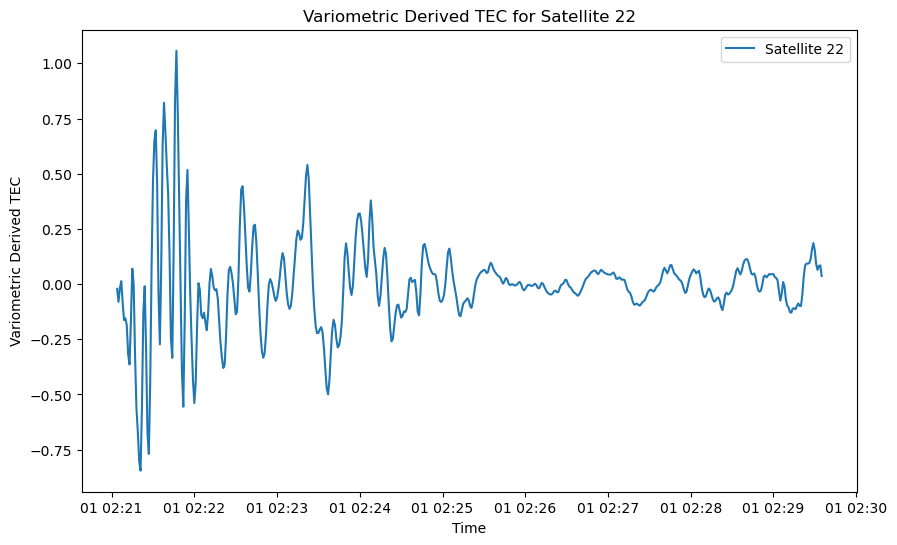

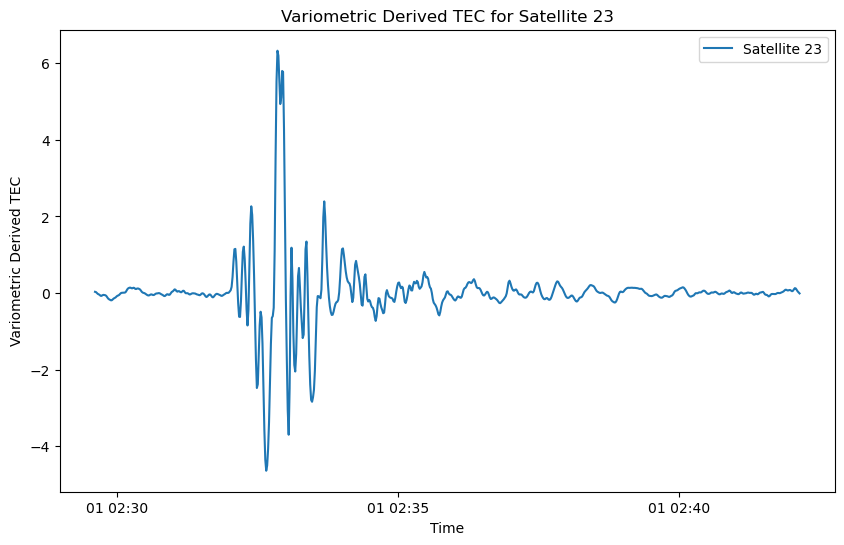

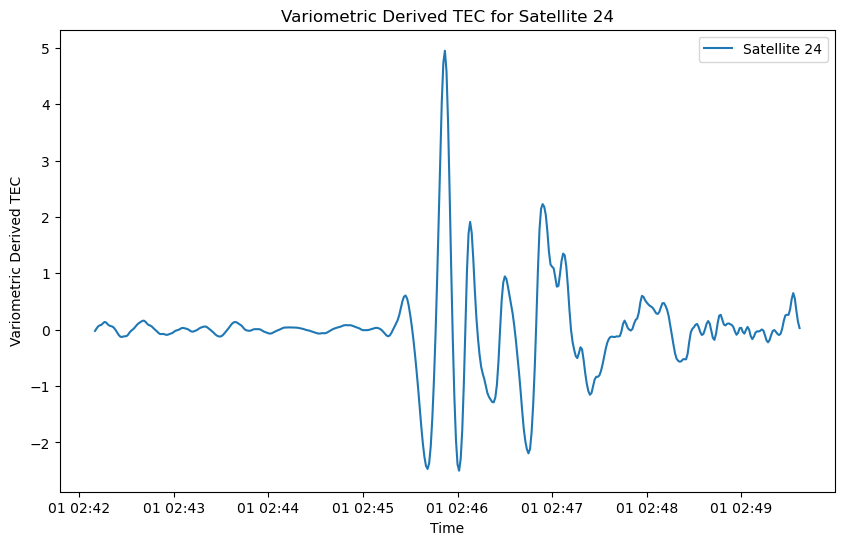

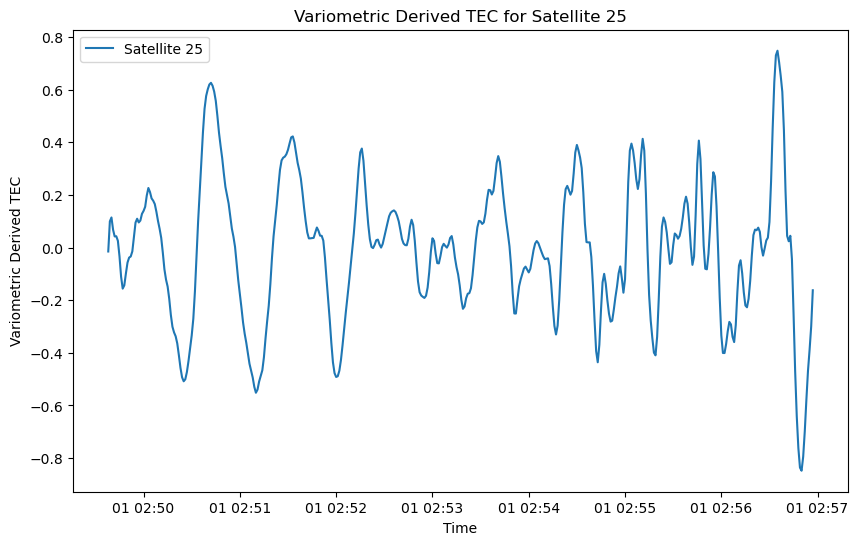

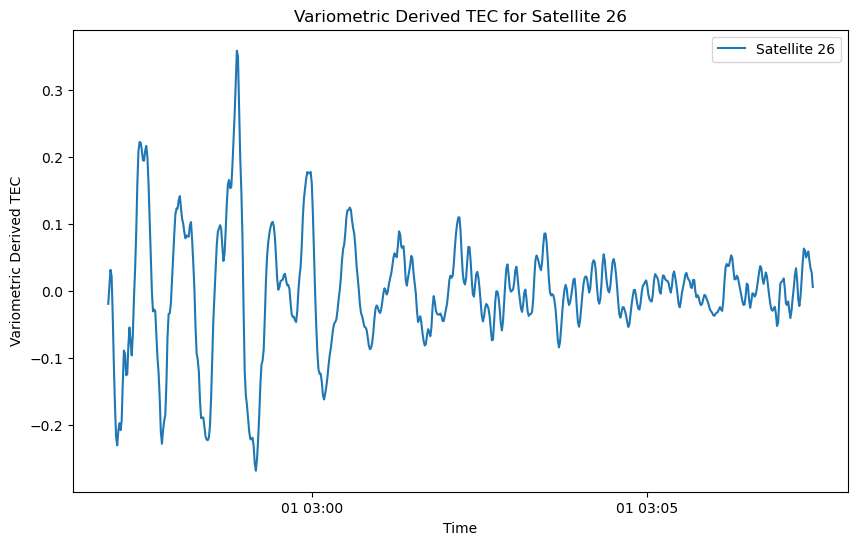

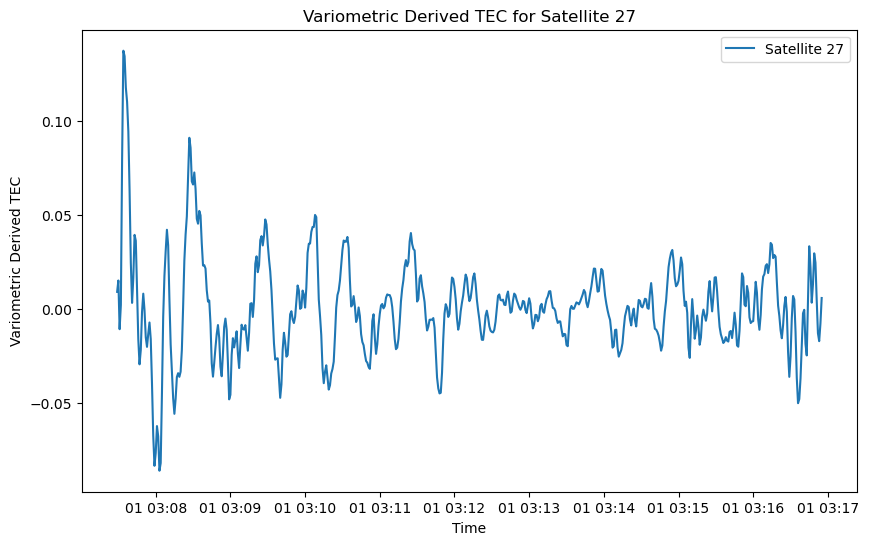

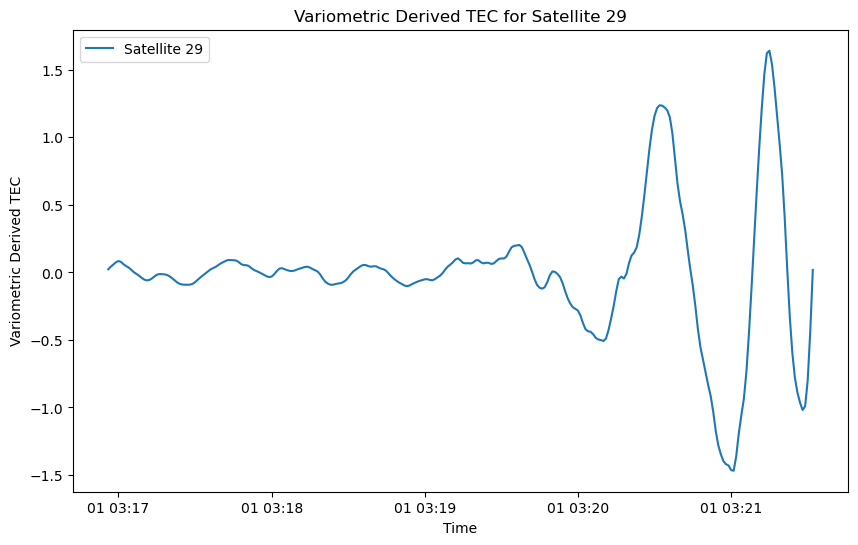

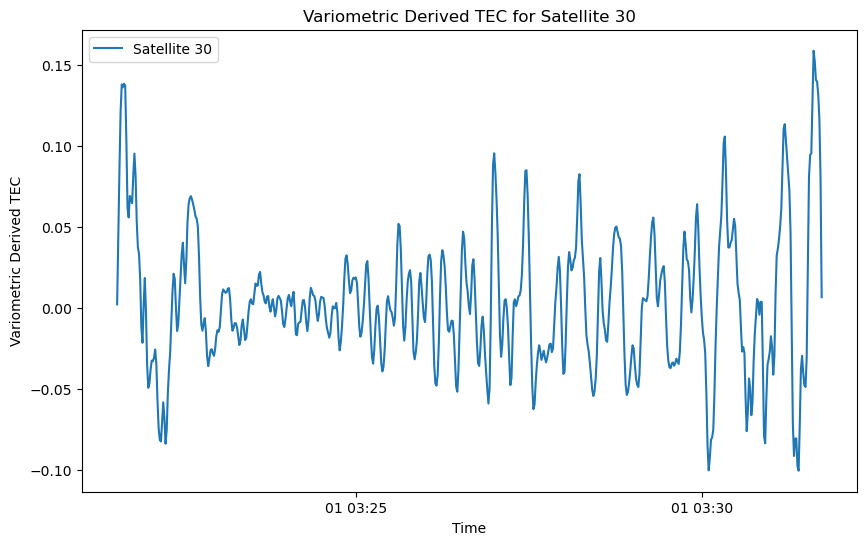

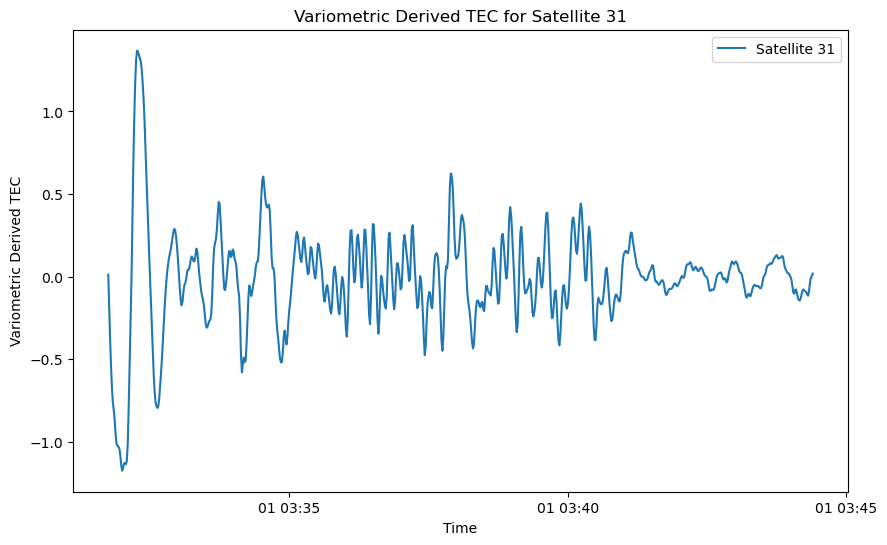

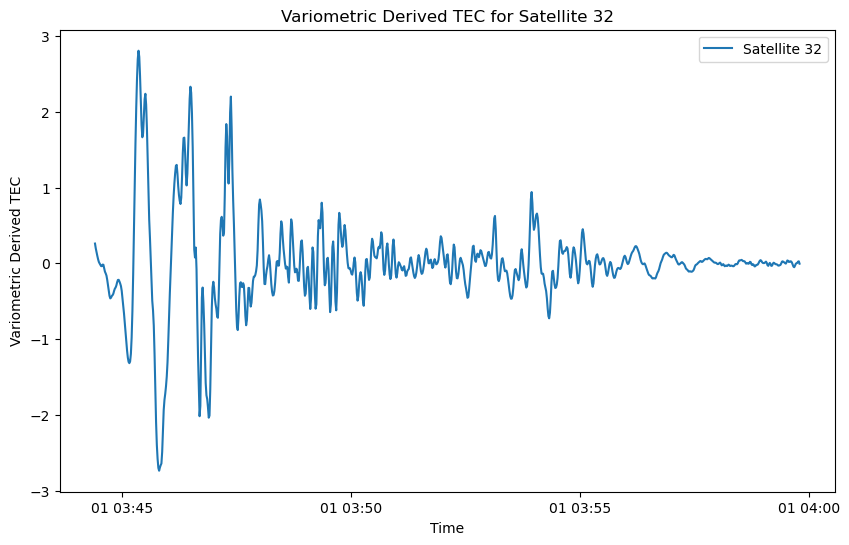

In [9]:
# split satellite data up
satellite_numbers = tec_data['satellite_number'].unique()

for satellite in satellite_numbers:
    # filter for one satellite at a time
    filtered_satellite = tec_data[tec_data['satellite_number'] == satellite]
    
    # convert time from timestamp to a Numpy array of dtpe
    x_values = np.array(filtered_satellite.index, dtype='datetime64[s]')
    
    # plot_date function
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot_date(x_values, filtered_satellite['variometric_derived_TEC_filtered'], '-', label=f'Satellite {satellite}')
    
    # Beautify the plot
    plt.title(f'Variometric Derived TEC for Satellite {satellite}')
    plt.xlabel('Time')
    plt.ylabel('Variometric Derived TEC')
    plt.legend()
    plt.show()

You can now select one of the satellite observations that contain a full vTEC signal.

### d. Perform the wavelet transform (3 points)

Just like in the article, perform the wavelet transform using a Morlet transform. Select the time series of interest and plot the time series. What can you tell about the time-frequency characteristic of these disturbances?

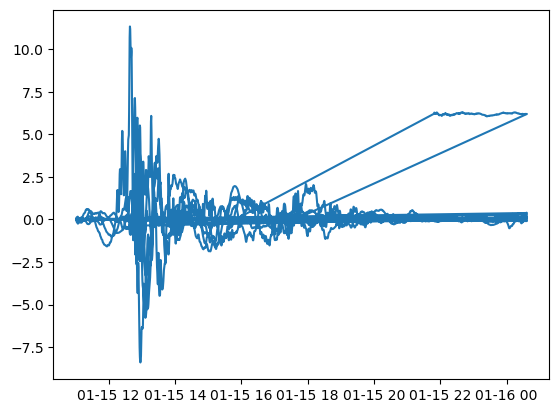

In [10]:
tec_time = tec_data['time'].values

plt.plot(tec_data_filt['time'], tec_data_filt['variometric_derived_TEC'])

# Just by looking at the timeseries you can see a strong temporal pattern and oscillations. The signals are very variable with frequency also varies.

Calculate the sampling frequency by taking the time difference between two samples.

In [13]:
time_diff = tec_data['time'].diff().mean()

# Calculate the sampling frequency
freq = 1 / time_diff.total_seconds()

print("Sampling Frequency:", sampling_frequency, "Seconds")

Sampling Frequency: -1.6257624826043415 Seconds


Perform the wavelet transform. You may choose a range of wavelet scales from 1 to 50 (write this as an array of integer), and call the ``cwt`` functions using the Morlet wavelet and taking the array of scales as an input argument. Plot it with an x-axis in time (hours) and y-axis in periods.

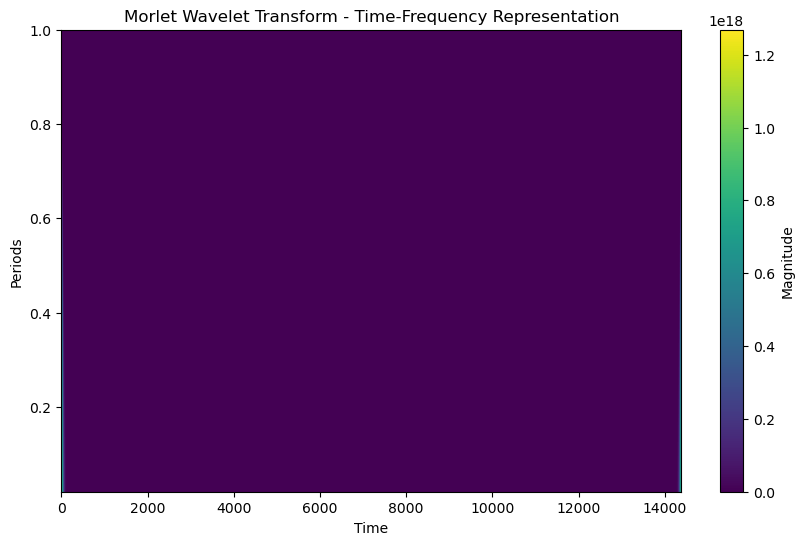

In [18]:
from scipy.signal import morlet, cwt

# time variable
time_series = tec_data['time']

# parameters given
w = np.arange(1, 50)

# morlet transform
coefficients = cwt(time_series, morlet, w)

# time series for plotting
time_array = np.arange(len(time_series))

# periods
periods = 1 / w

# plot
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[min(time_array), max(time_array), min(periods), max(periods)])
plt.colorbar(label='Magnitude')
plt.title('Morlet Wavelet Transform - Time-Frequency Representation')
plt.xlabel('Time')
plt.ylabel('Periods')
plt.show()

## e. Interpretation (0.5 points)
Can you describe the spectral features as a function of hours since the beginning of the time series? What periods dominate when?

I can't get my plot to come out right but I am assuming that it should look like what we got in class, where the periods are related to the length of the signal so that the first spectra at the beginning of the time series have a short period, as do the signals towards the end of the time series.

The authors interpret the first packet as coming from a Lamb wave (a powerful gravity-acoustic wave that travel in the lower atmosphere), the second as coming from the tsunami disturbance.

## 3) 2D Spectral analysis of geological models (10 points)

In this exercise we will correlate water table level with surface elevation. You may download the data just like in the class. The file names are ``NCM_GeologicFrameworksGrids.nc``, ``NCM_SpatialGrid.nc``, and ``NCM_AuxData.nc``.

We first download the data from our Dropbox folder


In [19]:
import wget
file1 = wget.download("https://www.dropbox.com/s/wdb25puxh3u07dj/NCM_GeologicFrameworkGrids.nc?dl=1") #"./data/NCM_GeologicFrameworkGrids.nc"
# Download the coordinate grids
file2 = wget.download("https://www.dropbox.com/s/i6tv3ug15oe6yhe/NCM_SpatialGrid.nc?dl=1") #"./data/NCM_GeologicFrameworkGrids.nc"
# Download the coordinate grids
file3 = wget.download("https://www.dropbox.com/s/92m20pehfu7rxp2/NCM_AuxData.nc?dl=1") #"./data/NCM_AuxData.nc"

100% [....................................................] 62906738 / 62906738


In the following we will prepare our data. Read the DataSets using the python NetCDF4 library.

In [20]:
import netCDF4 as nc

geology = nc.Dataset(file1)
grid = nc.Dataset(file2)
aux = nc.Dataset(file3)

**a. Plot (2 points)**

Plot the data ``WT`` and ``elevation``, which are data sets from the NC files. Use the matplotlib function``contourf``, and the variables for lat long ``x`` and ``y`` . You can use the argument ``levels`` to the contourf funxtion to split the color map into discrete contour levels, and the transparency argument ``alpha`` to be less than 1.

In [21]:
# answer below
print(geology)
# surface elevation dimensions = 3201, 4901, 31

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): dim1(3201), dim2(4901), dim9(31)
    variables(dimensions): |S1 Notes(dim9), float32 Surface Elevation(dim2, dim1), float32 Bedrock Elevation(dim2, dim1), float32 Bottom Cenozoic Elevation(dim2, dim1), float32 Bottom Phanerozoic Elevation(dim2, dim1), float32 Mid Crustal Elevation(dim2, dim1), float32 Moho Elevation(dim2, dim1), float32 Top Ocean Plate Elevation(dim2, dim1)
    groups: 


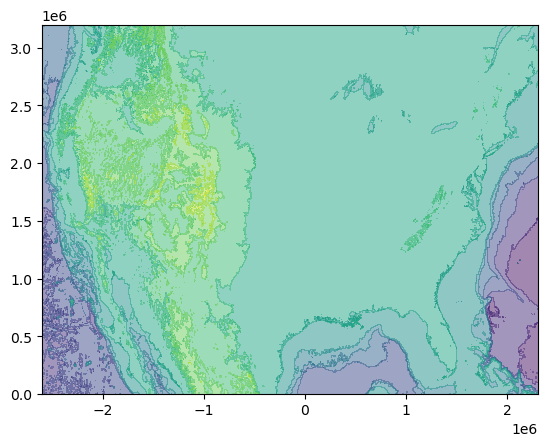

In [22]:
# plot below
x = grid['x'][0:4901, 0:3201]
y = grid['y'][0:4901, 0:3201]
elevation = geology['Surface Elevation'][0:4901, 0:3201]
plt.contourf(x, y, elevation, levels = 10, alpha = 0.5)

minlat,maxlat = min(grid['Latitude vector'][:]),max(grid['Latitude vector'][:])
minlon,maxlon = min(grid['Longitude vector'][:]),max(grid['Longitude vector'][:])
xlat = np.linspace(minlat,maxlat,3201)
xlon = np.linspace(minlon,maxlon,4901)

**b. Perform and plot the 2D Fourier transforms (4 points)**

longitudinal spatial sampling of the model  1.5007397612756534  km
latitudinal spatial sampling of the model  1.0777344413103096  km


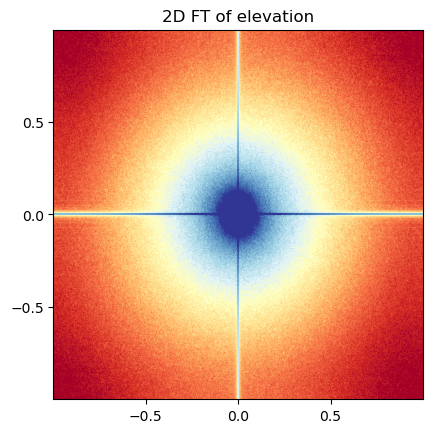

In [23]:
# answer below
from scipy.fftpack import fft2, fftfreq,fftshift, ifft2
import matplotlib.cm as cm

Zel = fft2(elevation)

# make a vector of distances
# make the wavenumber frequency vector: 
Rlon = (xlon-np.min(xlon))*111.25  # convert degrees to kms
drlon = Rlon[1]-Rlon[0]
print("longitudinal spatial sampling of the model ",drlon," km")
klon = (fftfreq( 4901//2 , drlon  ))

Rlat = (xlat-np.min(xlat))*111.25  # convert degrees to kms
drlat = Rlat[1]-Rlat[0]
print("latitudinal spatial sampling of the model ",drlat," km")
klat = (fftfreq( 3201//2 , drlat  ))

# amplitude of the DEM
plt.imshow(fftshift(np.log10(np.abs(Zel)/Zel.size)),vmin=-3, vmax=-1, cmap='RdYlBu',extent=[-1,1,-1,1])
plt.title('2D FT of elevation')
x_label_list = ['-1/3 km$^{-1}$','0','1/3  km$^{-1}$']
plt.xticks([-0.5,0,0.5])
plt.yticks([-0.5,0,0.5])
plt.show()

**c. Interpretation (1 point)**

Comment on the wavelengths that dominate the DEM and the water table wavelengths

The wavelengths that dominate the digital elevation model (DEM) are higher and the wavelengths for the water table decrease, as their velocity decreases.

**d. 2D filtering (3 points)**

Find a way to low pass filter the image (spectral filtering or convolution)

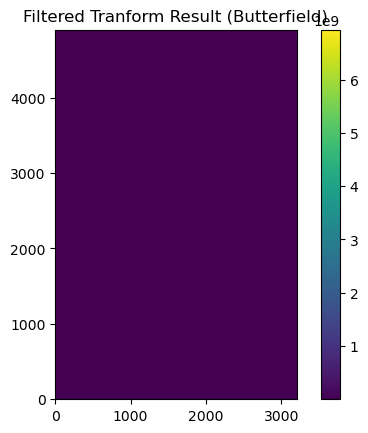

In [54]:
import scipy.signal as signal
# parameters
freq = 0.01
order = 6  # order

# butterworth
sos = signal.butter(order, freq, btype='low',output='sos')

# applu
filtered_Zel = signal.sosfiltfilt(sos, Zel, axis=0)

# results
plt.plot()
plt.imshow(np.abs(filtered_Zel), extent=[0, Zel.shape[1], 0, Zel.shape[0]])
plt.title('Filtered Tranform Result (Butterfield)')
plt.colorbar()


Now we will filter or compress by taking the largest Fourier coefficients of the image.

In [51]:
# Sort the Fourier coefficients
Zsort = np.sort(np.abs(np.abs(Zel).reshape(-1)))
print(len(Zsort))
print(Zsort.shape)

15688101
(15688101,)


Plot and reconstruct the image of the water table map with 1% until 10% of the data (like in class)

We are keeping up to 0.010000 the number of Fourier coefficients


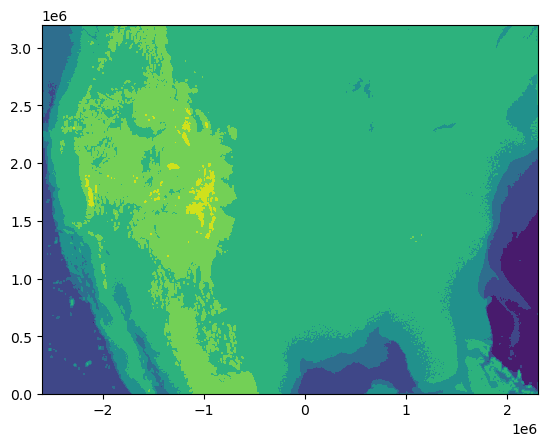

In [52]:
from IPython import display
import time

for keep in (0.1,0.05,0.01):
    display.clear_output(wait=True)
    thresh = Zsort[int(np.floor( (1-keep)*len(Zsort) ))]
    ind = np.abs(Zel)>thresh
    Atlow = Zel * ind # here we zero out the matrix
    # Here we count the number of non-zeros in the matrix
    print("We are keeping up to %f the number of Fourier coefficients" % keep)
    Alow = ifft2(Atlow).real
    plt.contourf(x, y, Alow)
    time.sleep(1)

Now we will compare the original 2D data set with the Fourier compressed data


We are keeping up to 0.010000 the number of Fourier coefficients


(-2600000.0, 2300000.0, 0.0, 3200000.0)

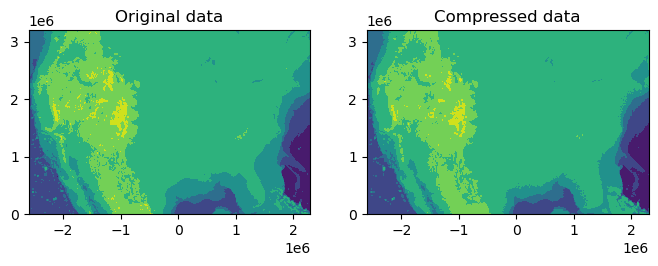

In [53]:
keep=0.01
thresh = Zsort[int(np.floor( (1-keep)*len(Zsort) ))]
ind = np.abs(Zel)>thresh
Atlow = Zel * ind # here we zero out the matrix
# Here we count the number of non-zeros in the matrix
print("We are keeping up to %f the number of Fourier coefficients" % keep)
Alow = ifft2(Atlow).real

fig,ax=plt.subplots(1,2,figsize=(8,8),sharex=True)
ax[0].contourf(x, y, elevation);ax[0].set_title('Original data')
ax[0].axis('scaled')
ax[1].contourf(x, y, Alow);ax[1].set_title('Compressed data')
ax[1].axis('scaled')